In [29]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.grid_search import GridSearchCV
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn import cross_validation

from scipy import stats  

%matplotlib inline


## Dataset preparation

In [2]:
index_ds = pd.read_csv('./index_ds.csv', index_col='Study.Num')

In [3]:
readability = pd.read_csv('./features/readability.csv', index_col='Study.Num')
references = pd.read_csv('./features/references.csv', index_col='name')

In [4]:
liwc_features = ['Analytic',
'Clout',
'Authentic',
'Tone',
'WPS',
'Sixltr',
'Dic',
'function.',
'pronoun',
'ppron',
'i',
'we',
'you',
'shehe',
'they',
'ipron',
'prep',
'adverb',
'conj',
'negate',
'compare',
'number',
'quant',
'cogproc',
'insight',
'cause',
'discrep',
'tentat',
'certain',
'differ']

In [53]:
drop_cols = []
for col in index_ds.columns:
    if (col not in liwc_features) and (col!='replicate'):
        drop_cols.append(col)

In [54]:
index_ds = index_ds.drop(drop_cols,1)

In [55]:
ds = index_ds.merge(readability, left_index=True, right_index=True)
ds = ds.merge(references, left_index=True, right_index=True)

In [56]:
results = pd.DataFrame(columns=['acc', 'classifier'])

## Ridge Classifier

In [57]:
N = 100
accuracy = []
alpha = []

In [58]:
lr = RidgeClassifier()
params = {'alpha':np.logspace(-5,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=6, cv=10)

In [59]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.alpha)
    

In [60]:
res = pd.DataFrame([accuracy, ['ridge']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

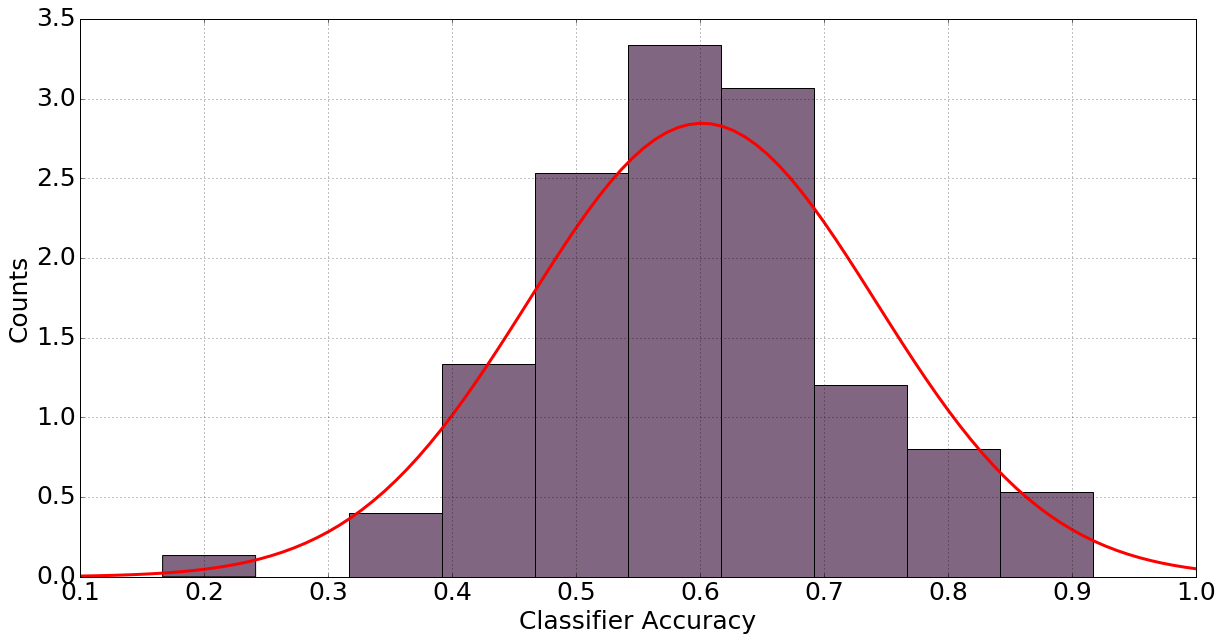

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xlabel('Classifier Accuracy', fontsize=25)
plt.ylabel('Counts', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.grid()
plt.hist(accuracy, normed=True, bins=10, rwidth=None, log=False, color=(0.5,0.4,0.5), 
         label=None, stacked=False, hold=None, data=None)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(accuracy))

pdf_g = stats.norm.pdf(lnspc, np.mean(accuracy), np.std(accuracy)) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm", lw=3, color='r') # plot it

## Logistic L2

In [62]:
accuracy = []
alpha = []

In [63]:
lr = LogisticRegression(penalty='l2')
params = {'C':np.logspace(-4,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=6, cv=10)

In [64]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.C)

In [65]:
res = pd.DataFrame([accuracy, ['logistic_l2']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Logistic L1

In [66]:
lr = LogisticRegression(penalty='l1')
params = {'C':np.logspace(-4,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=6, cv=10)
N = 50
accuracy = []
alpha = []

In [67]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.C)

In [68]:
res = pd.DataFrame([accuracy, ['logistic_l1']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Linear SVC

In [69]:
N = 100
accuracy = []
alpha = []

lr = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
          fit_intercept=True, intercept_scaling=1, 
          class_weight=None, verbose=0, random_state=None, 
          max_iter=1000)

params = {'C':np.logspace(-4,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=6, cv=10)


In [70]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.C)

In [71]:
res = pd.DataFrame([accuracy, ['linear_SVC']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## SVC

In [72]:
N = 100
accuracy = []
alpha = []

lr = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
         probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
         max_iter=-1, decision_function_shape=None, random_state=None)

params = {'C':np.logspace(-4,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=6, cv=10)

In [73]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    pred = gs.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    alpha.append(gs.best_estimator_.C)

In [74]:
res = pd.DataFrame([accuracy, ['SVC_radial']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

# Ensemble

## Random Forest

In [75]:
N = 100
accuracy = []
alpha = []

lr = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False,
                            n_jobs=4, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [76]:
for i in range(N):
    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)


In [77]:
res = pd.DataFrame([accuracy, ['random_forest']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Adaboost

In [95]:
N = 100
accuracy = []
alpha = []

lr = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=None)


In [96]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)
    

In [97]:
np.mean(accuracy)

0.60166666666666668

In [80]:
res = pd.DataFrame([accuracy, ['Adaboost']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Gradient Boosting

In [92]:
N = 100
accuracy = []
alpha = []

lr = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_depth=3, init=None, random_state=None, max_features=None, verbose=0,
                                max_leaf_nodes=None, warm_start=False, presort='auto')
lr.fit(X_train, y_train)


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [93]:
for i in range(N):
    
    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)

In [83]:
res = pd.DataFrame([accuracy, ['Gradient_Boosting']*N])
res = res.T
res.columns = ['acc', 'classifier']
results = results.append(res)

## Results

In [85]:
final = pd.DataFrame(columns = results.classifier.unique())
for clas in results.classifier.unique():
    tmp = results[results.classifier == clas].acc
    tmp.index = np.arange(len(tmp))    
    final.loc[:,clas] = tmp
    
    


In [86]:
means = final.drop(['logistic_l1', 'SVC_radial', 'random_forest'],1).mean()

In [87]:
std = final.drop(['logistic_l1', 'SVC_radial', 'random_forest'],1).std()

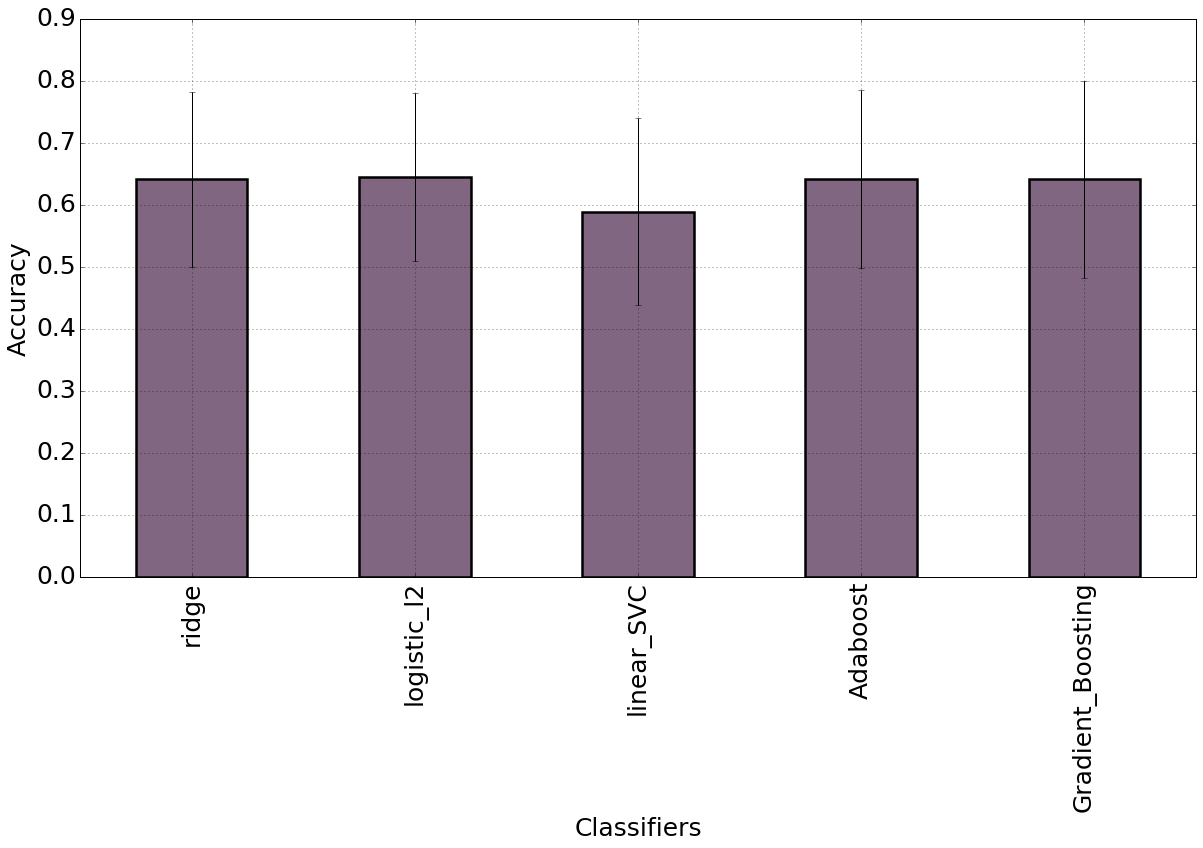

In [88]:
fig, ax = plt.subplots(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Classifiers', fontsize=25)
means.plot.bar(yerr=std, ax=ax, color=(0.5,0.4,0.5), fontsize=25, grid=True, lw=2.5)

In [49]:
means = pd.Series([.68,.65, .62], index=['Naive Bayes', 'SVM TFIDF', 'SVM DFM'])
std = pd.Series([.13, .13, .14],index=['Naive Bayes', 'SVM TFIDF', 'SVM DFM'])

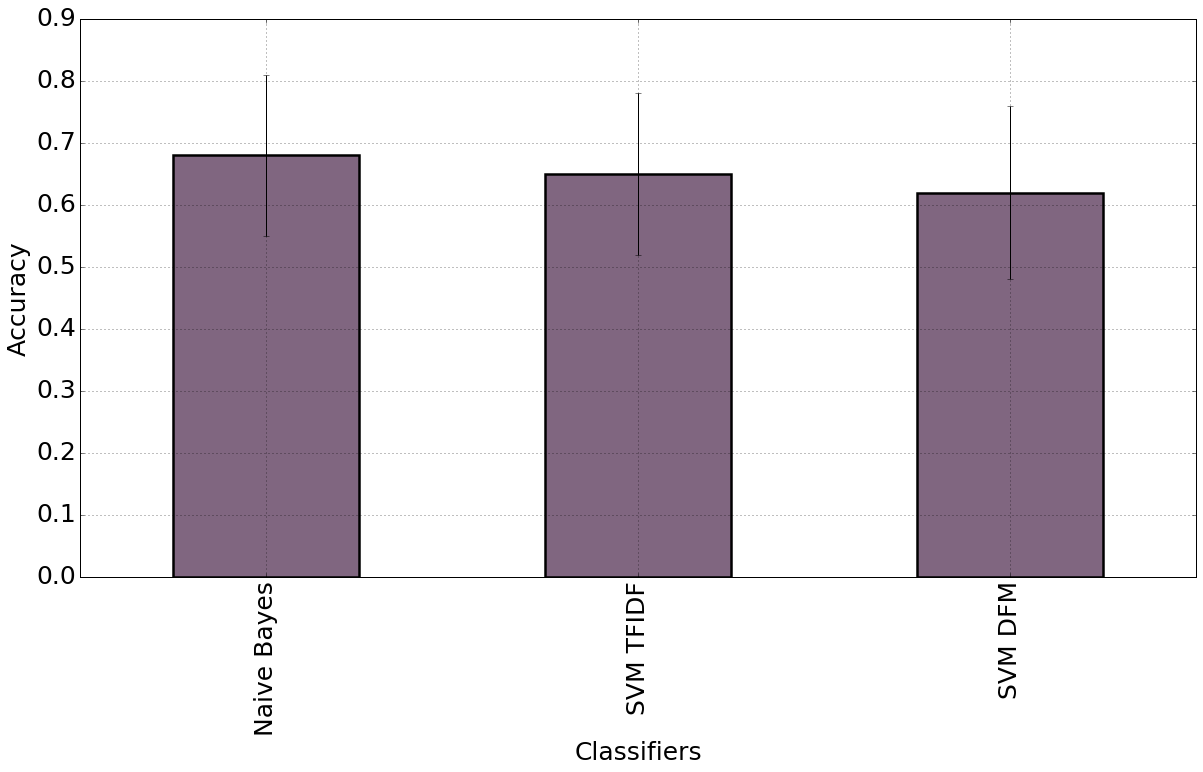

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Classifiers', fontsize=25)

means.plot.bar(yerr=std, ax=ax, color=(0.5,0.4,0.5), fontsize=25, grid=True, lw=2.5)

## Ridge feature importance

In [318]:
lr = RidgeClassifier()
params = {'alpha':np.logspace(-5,3,30)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy', n_jobs=4)

coefs = []

In [320]:
for i in range(N):

    train, test = train_test_split(ds, train_size=0.9)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
    
    gs.fit(X_train, y_train)
    coefs.append(gs.best_estimator_.coef_)
    

In [359]:
features = ds.drop('replicate',1).columns

In [336]:
coefs_array = np.array([x[0] for x in coefs])
coefs_ds = pd.DataFrame(coefs_array)
coefs_sum = np.abs(coefs_ds).sum()

In [360]:
coefs_sum.index = features

In [369]:
coefs_sum.sort_values(ascending=False)[1:10]

i          1255.466658
we         1236.214745
they       1206.595188
shehe      1199.359474
you        1172.457431
ipron       637.496550
pronoun     634.866243
cause        32.348822
cogproc      30.105413
dtype: float64